# Importing for libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import seaborn as sms #
from keras import models
from keras import layers



# load dataset

In [4]:
dataframe=pd.read_csv('sonar.csv',header=None)

In [5]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Shuffling splitting and encoding

In [9]:
df=dataframe.sample(frac=1)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
82,0.0409,0.0421,0.0573,0.0130,0.0183,0.1019,0.1054,0.1070,0.2302,0.2259,...,0.0028,0.0036,0.0105,0.0120,0.0087,0.0061,0.0061,0.0030,0.0078,R
158,0.0107,0.0453,0.0289,0.0713,0.1075,0.1019,0.1606,0.2119,0.3061,0.2936,...,0.0164,0.0120,0.0113,0.0021,0.0097,0.0072,0.0060,0.0017,0.0036,M
113,0.0283,0.0599,0.0656,0.0229,0.0839,0.1673,0.1154,0.1098,0.1370,0.1767,...,0.0147,0.0170,0.0158,0.0046,0.0073,0.0054,0.0033,0.0045,0.0079,M
83,0.0217,0.0340,0.0392,0.0236,0.1081,0.1164,0.1398,0.1009,0.1147,0.1777,...,0.0031,0.0103,0.0078,0.0077,0.0094,0.0031,0.0030,0.0013,0.0069,R
148,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,...,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,0.0191,0.0173,0.0291,0.0301,0.0463,0.0690,0.0576,0.1103,0.2423,0.3134,...,0.0040,0.0136,0.0137,0.0172,0.0132,0.0110,0.0122,0.0114,0.0068,M
94,0.0025,0.0309,0.0171,0.0228,0.0434,0.1224,0.1947,0.1661,0.1368,0.1430,...,0.0149,0.0077,0.0036,0.0114,0.0085,0.0101,0.0016,0.0028,0.0014,R
133,0.0790,0.0707,0.0352,0.1660,0.1330,0.0226,0.0771,0.2678,0.5664,0.6609,...,0.0298,0.0390,0.0294,0.0175,0.0249,0.0141,0.0073,0.0025,0.0101,M
196,0.0050,0.0017,0.0270,0.0450,0.0958,0.0830,0.0879,0.1220,0.1977,0.2282,...,0.0165,0.0056,0.0010,0.0027,0.0062,0.0024,0.0063,0.0017,0.0028,M


In [7]:
sonar=df.values


In [10]:
data = sonar[:,0:60].astype('float')
labels = sonar[:,60]
from sklearn.preprocessing import LabelEncoder
# encode class values as integers
le = LabelEncoder()
encoded_Y = le.fit_transform(labels)
encoded_Y.ndim

1

In [19]:
x_train_data = sonar[:144,:60].astype('float') 
y_train_label = encoded_Y[:144]
x_test_data = sonar[144:,:60].astype('float')
y_test_label = encoded_Y[144:]
print(y_train_label.ndim)

1


In [20]:
print(x_train_data.shape)
print(y_train_label.shape)
print(x_test_data.shape)
print(y_test_label.shape)

(144, 60)
(144,)
(64, 60)
(64,)


In [21]:
x_val=x_train_data[:21] #totl 40k hain jisme se validation me 10k ja rahe hain
partial_x_train=x_train_data[21:] #or baki partial me ja rahe ha
y_val=y_train_label[:21]
partial_y_train=y_train_label[21:]


In [25]:
print(x_val.shape)
print(y_val.ndim)
print(partial_x_train.shape)
partial_x_train.shape[1]

(21, 60)
1
(123, 60)


60

# building model

In [26]:
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(40,activation='relu',input_dim=60))
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


# k FOLD

In [28]:
k=10
num_val_samples=len(partial_x_train)//k
num_epochs=50
all_scores=[]
all_mae_histories=[]
for i in range(k):
    print("proccessing fold #",i)
    val_data=partial_x_train[i*num_val_samples:(i+1)*num_val_samples]
    val_labels=partial_y_train[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data=np.concatenate([partial_x_train[:i*num_val_samples],partial_x_train[(i+1)*num_val_samples:]],axis=0)
    partial_train_labels=np.concatenate([partial_y_train[:i*num_val_samples],partial_y_train[(i+1)*num_val_samples:]],axis=0)
    model=build_model()
    history=model.fit(partial_train_data, partial_train_labels,
                      epochs=num_epochs, batch_size=30, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
    all_scores.append(val_mae)
    mae_history = history.history['accuracy']
    all_mae_histories.append(mae_history)

proccessing fold # 0
proccessing fold # 1
proccessing fold # 2
proccessing fold # 3
proccessing fold # 4
proccessing fold # 5
proccessing fold # 6
proccessing fold # 7
proccessing fold # 8
proccessing fold # 9


In [33]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print('all fold validation error',all_scores)
print('mean of all fold validation error',np.mean(all_scores))
print('average_mae_history',average_mae_history )                     

all fold validation error [0.8333333134651184, 0.9166666865348816, 0.9166666865348816, 0.5, 0.6666666865348816, 0.75, 0.9166666865348816, 0.9166666865348816, 0.75, 0.8333333134651184]
mean of all fold validation error 0.8000000059604645
average_mae_history [0.5063063, 0.52792794, 0.5936936, 0.63873875, 0.67477477, 0.6963964, 0.718018, 0.7108108, 0.718018, 0.7369369, 0.7369369, 0.7522522, 0.7684685, 0.7792793, 0.7783784, 0.78198195, 0.7837838, 0.7945946, 0.8018018, 0.80540544, 0.80630624, 0.81261265, 0.8162163, 0.8207208, 0.8279279, 0.8234234, 0.82972974, 0.83243245, 0.83423424, 0.84414417, 0.8513514, 0.8504504, 0.8522523, 0.8531531, 0.8594594, 0.8504504, 0.8567568, 0.86576575, 0.8666667, 0.86846846, 0.86576575, 0.86756766, 0.87477475, 0.8747748, 0.8765766, 0.8747748, 0.8756757, 0.8756757, 0.8756757, 0.8783785]


In [34]:
[len(x) for x in all_mae_histories]

[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]

In [36]:
history=model.fit(partial_x_train,partial_y_train,epochs=30,batch_size=10,validation_data=(x_val,y_val))

Train on 123 samples, validate on 21 samples
Epoch 1/30
123/123 [==============================] - 1s 8ms/step - loss: 0.3772 - accuracy: 0.8455 - val_loss: 0.4271 - val_accuracy: 0.8571
Epoch 2/30
123/123 [==============================] - 0s 268us/step - loss: 0.3598 - accuracy: 0.8537 - val_loss: 0.3777 - val_accuracy: 0.8571
Epoch 3/30
123/123 [==============================] - 0s 268us/step - loss: 0.3507 - accuracy: 0.8618 - val_loss: 0.4588 - val_accuracy: 0.8095
Epoch 4/30
 10/123 [=>............................] - ETA: 0s - loss: 0.2089 - accuracy: 1.0000

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.119969). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


123/123 [==============================] - 0s 487us/step - loss: 0.3298 - accuracy: 0.8780 - val_loss: 0.3900 - val_accuracy: 0.8571
Epoch 5/30
123/123 [==============================] - 0s 358us/step - loss: 0.3235 - accuracy: 0.8780 - val_loss: 0.4409 - val_accuracy: 0.8571
Epoch 6/30
123/123 [==============================] - 0s 406us/step - loss: 0.3130 - accuracy: 0.8862 - val_loss: 0.4538 - val_accuracy: 0.8095
Epoch 7/30
123/123 [==============================] - 0s 463us/step - loss: 0.2975 - accuracy: 0.8862 - val_loss: 0.4167 - val_accuracy: 0.8571
Epoch 8/30
123/123 [==============================] - 0s 683us/step - loss: 0.2889 - accuracy: 0.9024 - val_loss: 0.4176 - val_accuracy: 0.8571
Epoch 9/30
123/123 [==============================] - 0s 309us/step - loss: 0.2783 - accuracy: 0.9024 - val_loss: 0.3860 - val_accuracy: 0.8571
Epoch 10/30
123/123 [==============================] - 0s 325us/step - loss: 0.2815 - accuracy: 0.8943 - val_loss: 0.4547 - val_accuracy: 0.8095
Ep

In [39]:

test_mse_score, test_mae_score = model.evaluate(x_test_data,y_test_label)
test_mse_score


64/64 [==============================] - 0s 78us/step


0.38777270913124084

In [44]:
test_mae_score

0.84375

In [45]:
history_dict=history.history

# plot graph

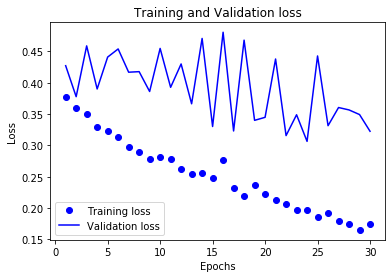

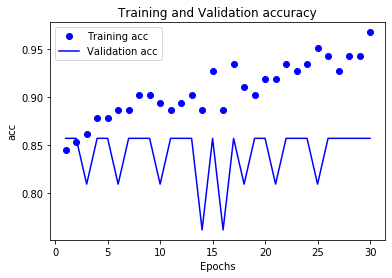

<function matplotlib.pyplot.clf()>

In [46]:

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(acc_values)+1)
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()
plt.clf